In [3]:
import pandas as pd

In [4]:
## Data Ingestions step
df=pd.read_csv('data/audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [5]:
print(len(df))

10668


In [6]:
df.shape

(10668, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [8]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Categorical Columns: Index(['model', 'transmission', 'fuelType'], dtype='object')


In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [10]:
##check the null value

df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
df.duplicated().sum()

103

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.shape

(10565, 9)

In [14]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [15]:
###Handling the categorical features
##Handling the model column
df["model"].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [16]:
##Apply Label encoding in model column because there are multiple unique values so,on doing the one hot encoding there are
#multiple columns created so,that it is not the best choice....so,that we will apply Label encoding

from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['model']= label_encoder.fit_transform(df['model'])

In [17]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,5,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,0,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,2,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [18]:
#Handle the transmission column

df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [20]:
# Encode in column 'transmission'.
df['transmission']= label_encoder.fit_transform(df['transmission'])

In [21]:
#Handle the fuel type column

df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [22]:
# Encode in column 'fuel Type'.
df['fuelType']= label_encoder.fit_transform(df['fuelType'])

In [23]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10565 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10565 non-null  int64  
 1   year          10565 non-null  int64  
 2   price         10565 non-null  int64  
 3   transmission  10565 non-null  int64  
 4   mileage       10565 non-null  int64  
 5   fuelType      10565 non-null  int64  
 6   tax           10565 non-null  int64  
 7   mpg           10565 non-null  float64
 8   engineSize    10565 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 825.4 KB


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

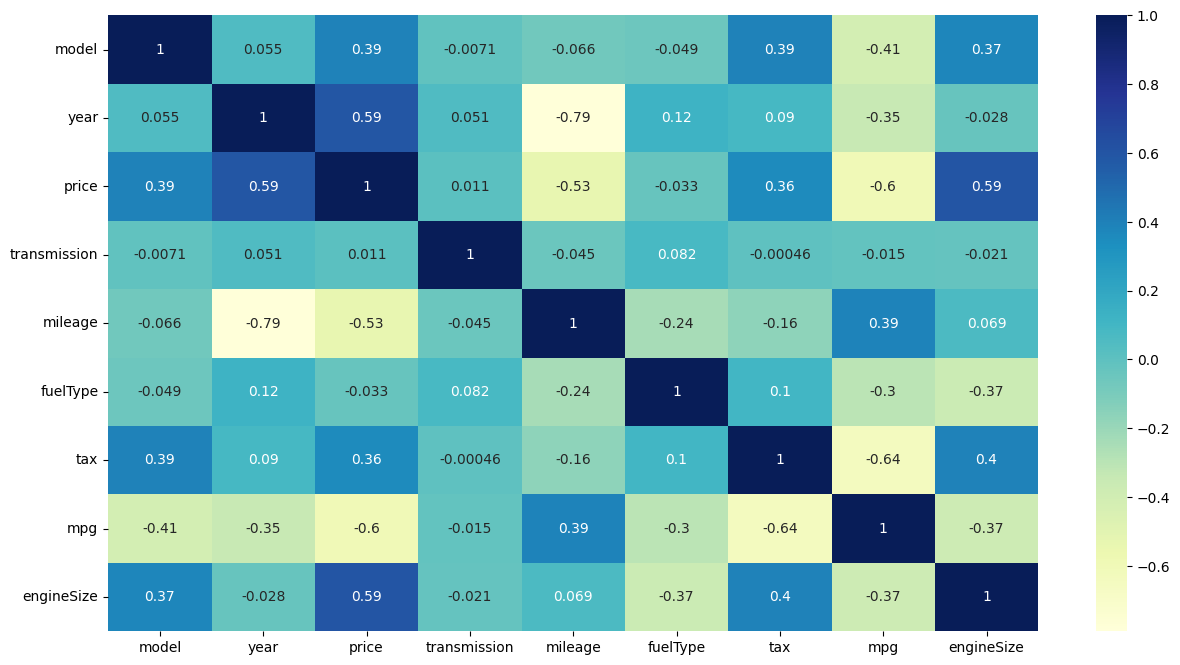

In [27]:
#Find the correlation of each features with each other
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

<Axes: >

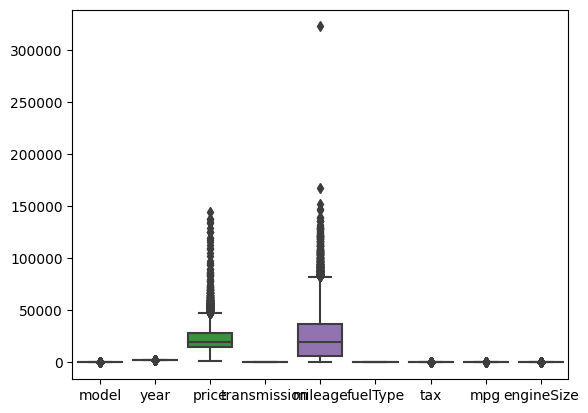

In [28]:
##Checking the outliers present

sns.boxplot(df)

/config/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


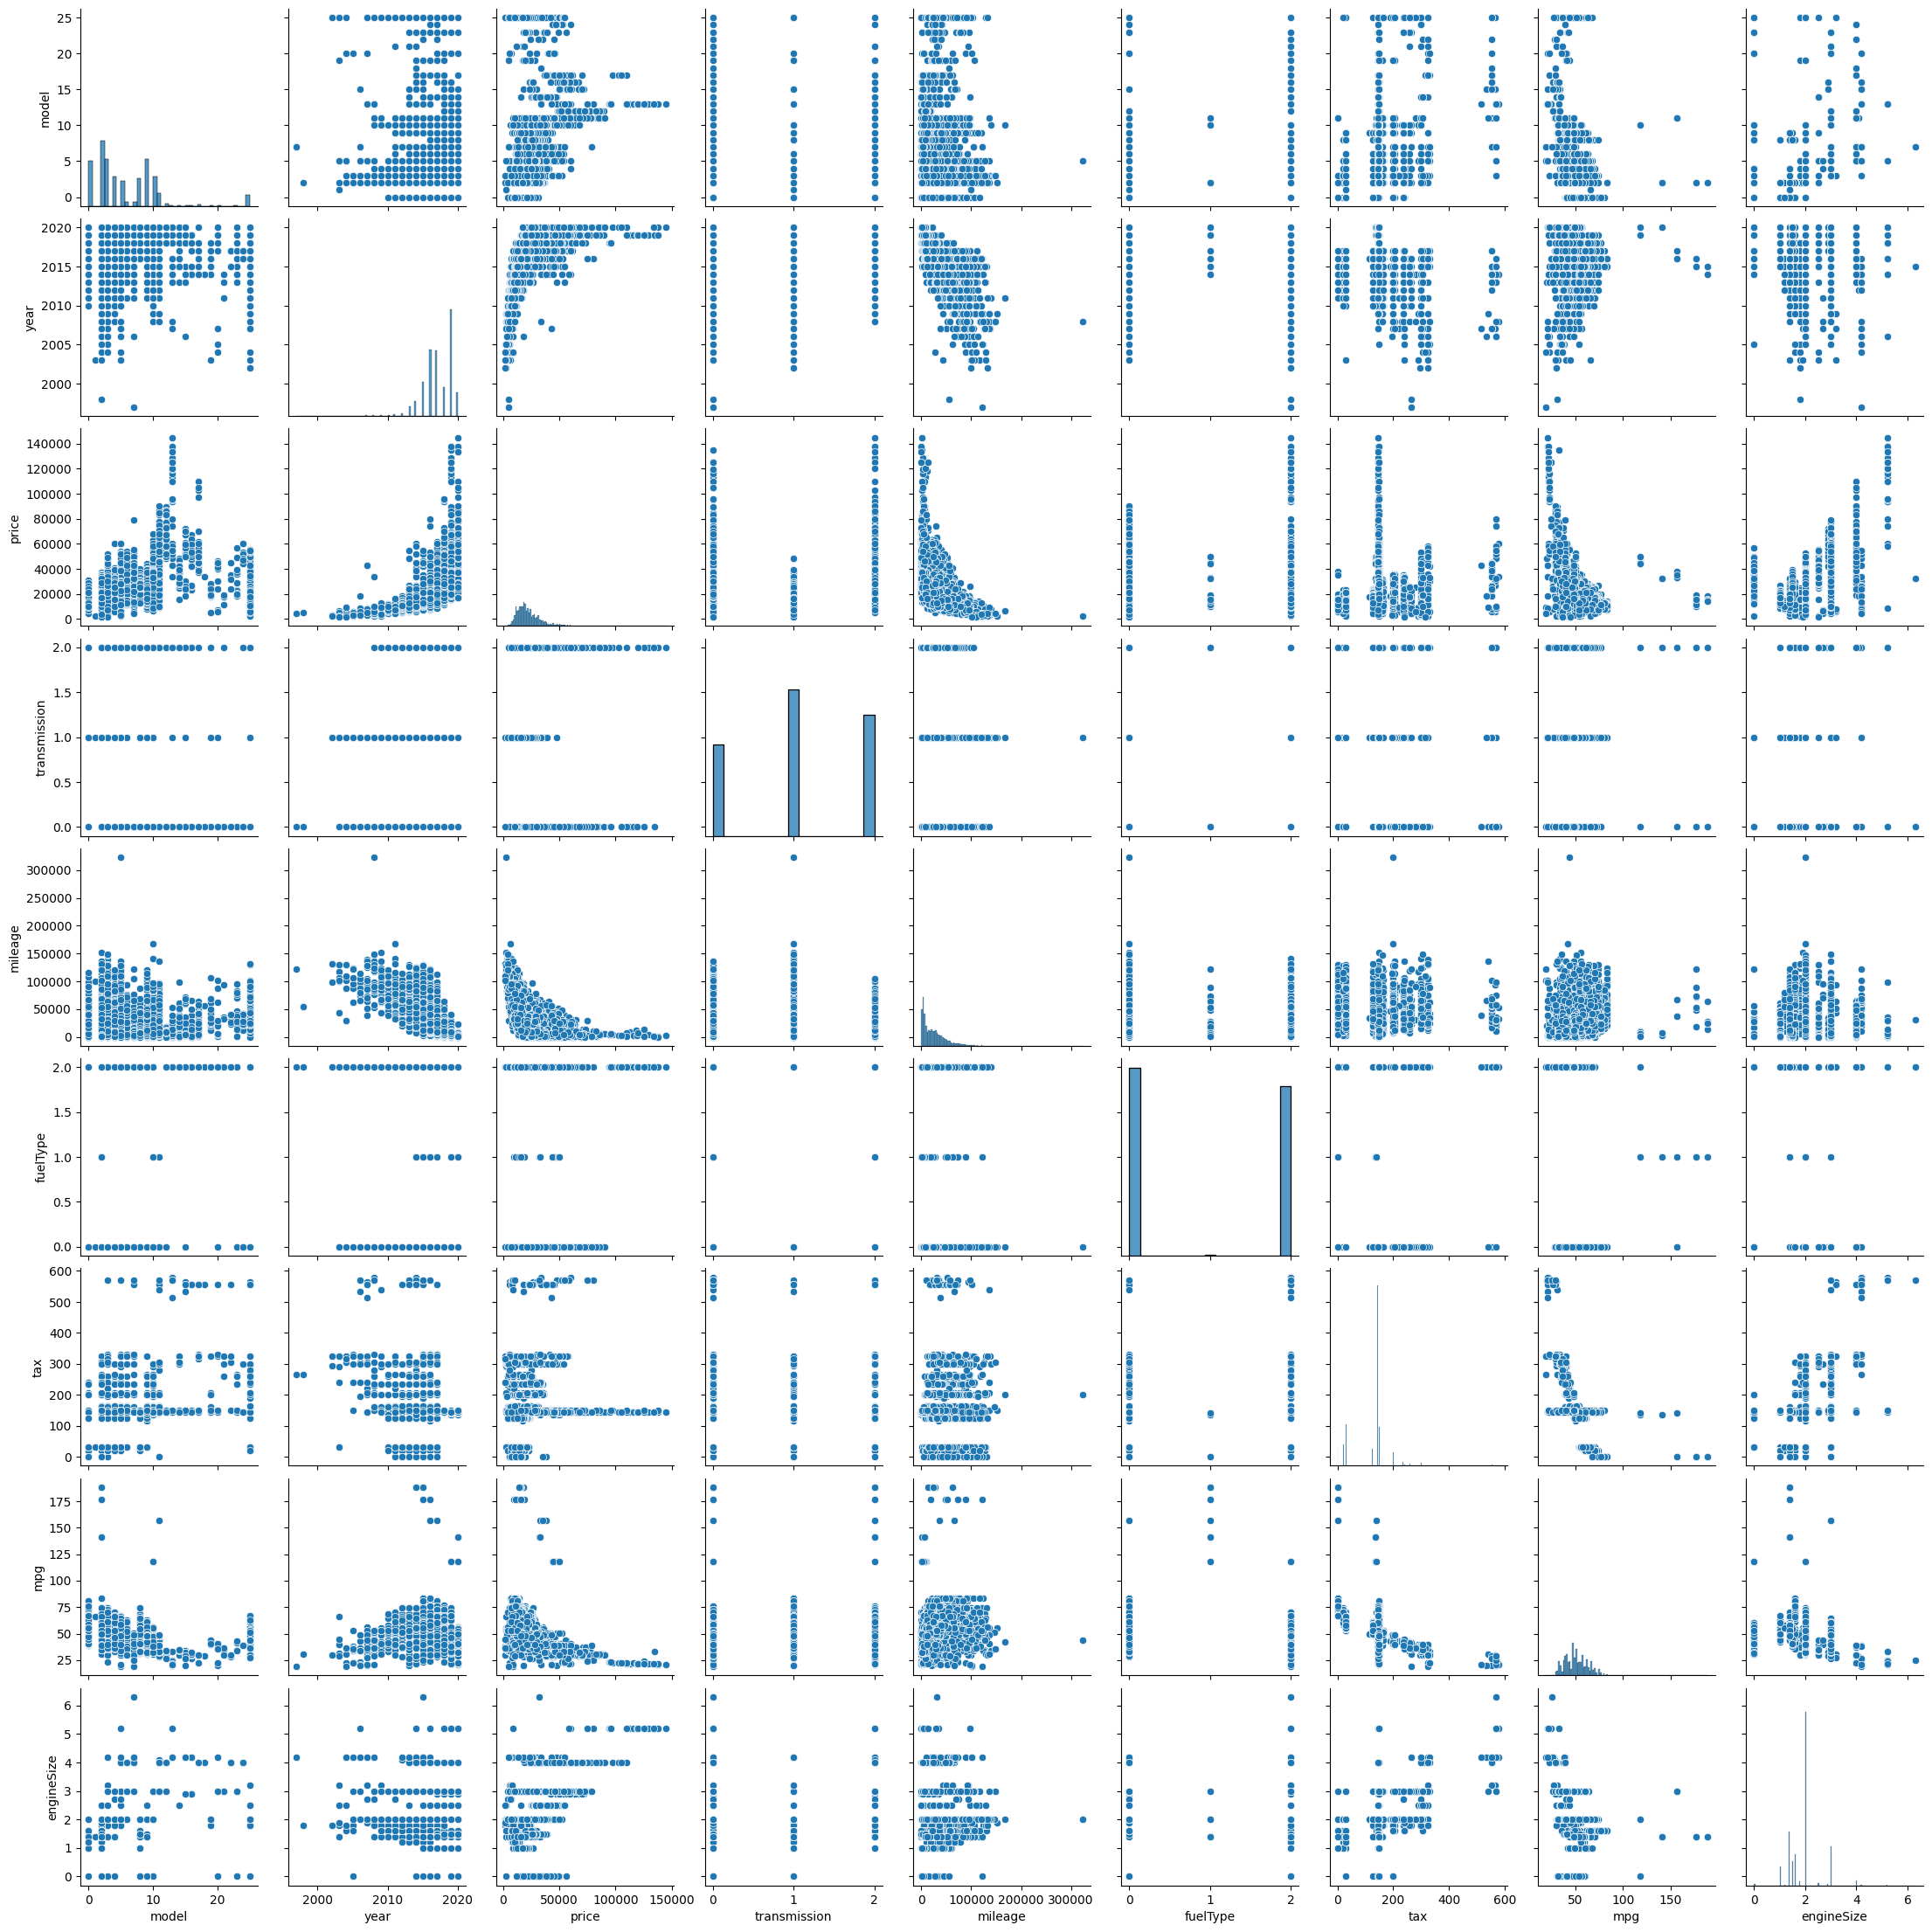

In [29]:
sns.pairplot(df)   

In [30]:
df.drop(['fuelType'],axis=1,inplace=True)    ##it does not affect much the output feature..so,jst drop it

In [31]:
df.head()

,model,year,price,transmission,mileage,tax,mpg,engineSize
0,0,2017,12500,1,15735,150,55.4,1.4
1,5,2016,16500,0,36203,20,64.2,2.0
2,0,2016,11000,1,29946,30,55.4,1.4
3,3,2017,16800,0,25952,145,67.3,2.0
4,2,2019,17300,1,1998,145,49.6,1.0


In [32]:
df.shape

(10565, 8)

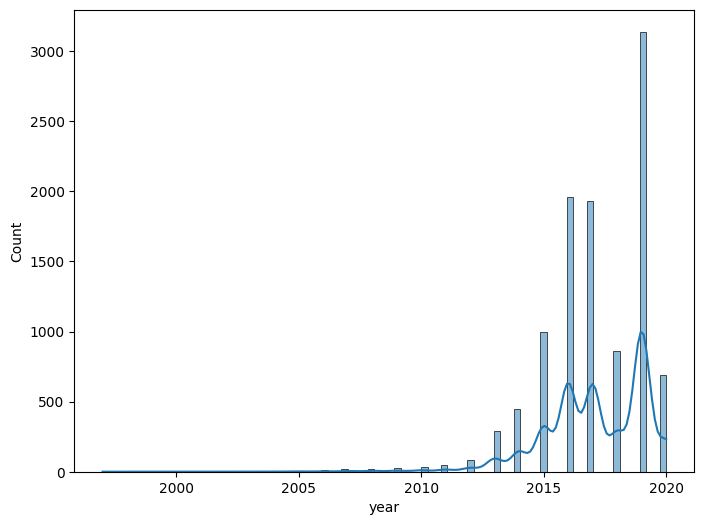

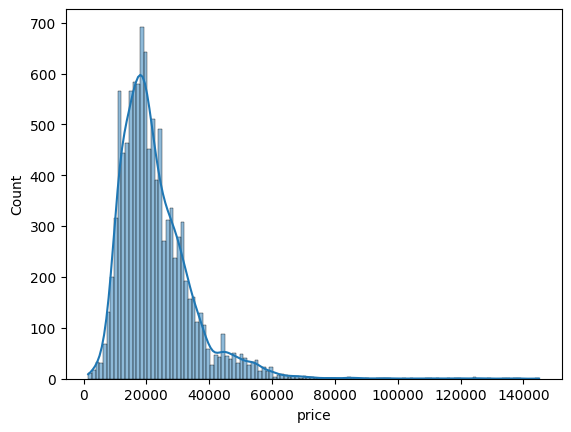

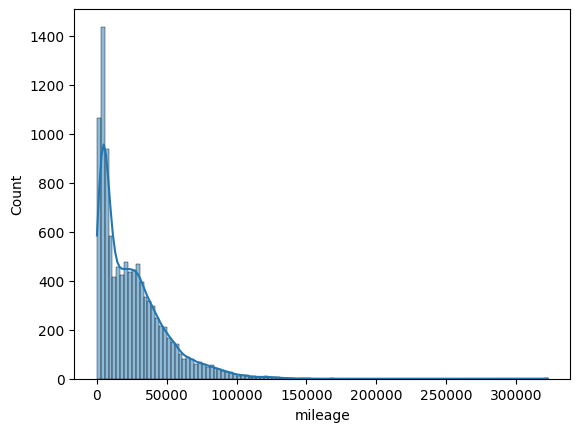

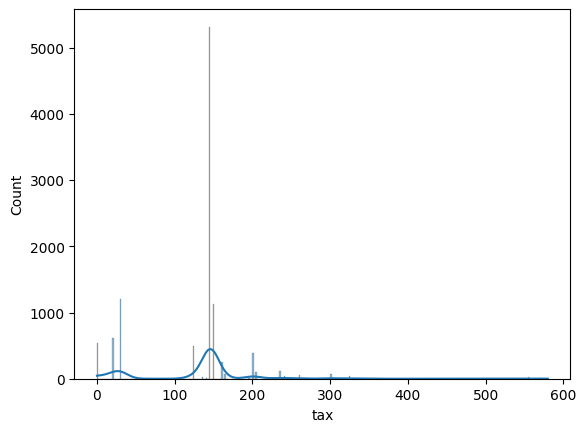

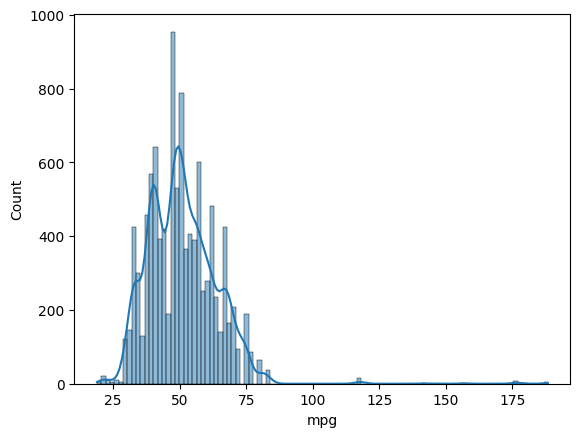

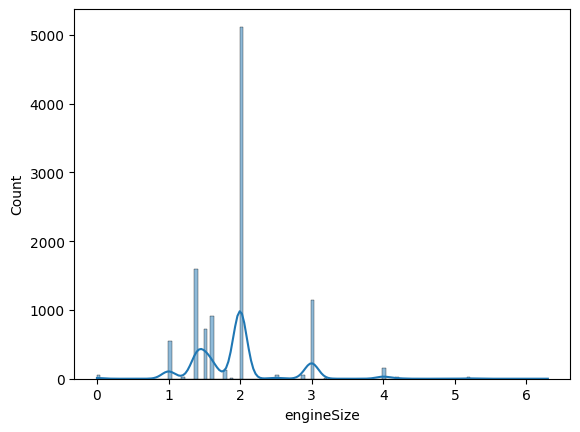

In [33]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()